In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests 
from imp import reload 
import Util; reload(Util)
import Cdf
import Pmf
import warnings
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
google_data = pd.read_csv('../dataset/google.csv', sep = ',', encoding = "ISO-8859-1")
fb_data = pd.read_csv('../dataset/facebook.csv', sep = ',', encoding = "ISO-8859-1")
ut_data = pd.read_csv('../dataset/youtube-jun.csv', sep = ',', encoding = "ISO-8859-1")

# google_data = google_data[google_data['date'] >= '2016-08-01']
# fb_data = fb_data[fb_data['date'] >= '2016-08-01']
# google_data = google_data[google_data['date'] < '2017-08-01']
# fb_data = fb_data[fb_data['date'] < '2017-08-01']

google_asn = [15169, 43515, 36040]

In [3]:
google_data[google_data['isp_cache'] == 1].head()

,Unnamed: 0,msmid,date,service,cdnname,isp_cache,ipversion,ttl
46,2534,01d18bf2eaa611e4852c00e08147c934,2015-07-15,www.google.com,None,1,4,5.000000
65,3525,01d18bf2eaa611e4852c00e08147c934,2015-07-27,www.google.com,None,1,4,5.000000
74,4037,01d18bf2eaa611e4852c00e08147c934,2015-07-31,www.google.com,None,1,4,5.670157
93,5071,01d18bf2eaa611e4852c00e08147c934,2015-08-11,www.google.com,None,1,4,6.000000
96,5239,01d18bf2eaa611e4852c00e08147c934,2015-08-12,www.google.com,None,1,4,5.000000


In [4]:
# measurementID and unit_id
probes_data = {"bdf8bc9a8af611e2a74900e08147c934":123256
,"28f784568afa11e2b54500e08147c934":62712
,"635cd9468afc11e2901a00e08147c934":148644
,"915c1bf6b4a311e2a0d300e08147c934":148650
,"28ea168ace7111e28ebf00e08147c934":167808
,"756a5566d51411e2ac9f00e08147c934":148634
,"689e8df6d8fd11e297d600e08147c934":181536
,"93758a3eda6511e2814500e08147c934":143666
,"d8bd1eecdf1311e2814500e08147c934":148648
,"b9932adee24711e288cf00e08147c934":129210
,"9a890ef67f9511e3908700e08147c934":239416
,"8c3652e2810611e3a2f800e08147c934":200864
,"1c122042829e11e3a2f800e08147c934":19602
,"43429f748f4711e3b77500e08147c934":200172
,"92d329488fd611e3b77500e08147c934":241735
,"05fc09a697e511e3913100e08147c934":181532
,"27b0bd32a2fb11e3a2f800e08147c934":201338
,"7931bc2ea87811e3914e00e08147c934":241733
,"60e88ffeaf3e11e3971a00e08147c934":241743
,"45792d9aaf4411e3971a00e08147c934":474346
,"ee63c7e6291811e4ae5700e08147c934":148220
,"85342e725f6a11e486cd00e08147c934":631352
,"358555645f7311e486cd00e08147c934":631646
,"1ac50686606611e4b7ae00e08147c934":483702
,"5cb438409c1711e4887c00e08147c934":632384
,"a63430ccb5c811e4a69300e08147c934":658891
,"f7ccdbaab5c811e4895500e08147c934":658893
,"a2a0f6a6b5c911e49e2800e08147c934":658895
,"17c17a6eb5ca11e4817000e08147c934":658901
,"b161960cb5cc11e4b42200e08147c934":658739
,"ee3c3528b5cc11e4990c00e08147c934":658741
,"561d587ab5cd11e49e2800e08147c934":659044
,"f2fad71ab61a11e4a67900e08147c934":635478
,"02892dd4be6e11e49ffd00e08147c934":635734
,"416ba4dcbe6e11e49e2800e08147c934":658897
,"dadf6ae0be6e11e4a67900e08147c934":658899
,"a576f7ecbe7311e4817000e08147c934":658875
,"f3d48fe4be7311e4a00300e08147c934":660078
,"4f2f4cb6c1bd11e49e2800e08147c934":660160
,"3cef0680c1be11e4b42200e08147c934":660166
,"d72c328ac1bf11e4990c00e08147c934":658737
,"2fa51e40c1c011e49e2800e08147c934":660120
,"07ff9a68c1c111e49ffd00e08147c934":632406
,"f29a719ec65611e4a69300e08147c934":658929
,"07e1bc68c65911e4a69300e08147c934":660864
,"4eb3f818c65911e4a00300e08147c934":660146
,"68efa646c65911e49ffd00e08147c934":660148
,"0d33c84ec65b11e49ffd00e08147c934":632438
,"5a7ce5d6c65b11e49ffd00e08147c934":660162
,"bfd3643ec69511e4a67900e08147c934":660128
,"7cb11ea8c97411e4a00300e08147c934":525918
,"e681bb1cc97411e4a69300e08147c934":660862
,"2fadc1cac97811e4a00300e08147c934":525884
,"0ac18d78c97911e4a67900e08147c934":660170
,"848b60b0c98e11e4a69300e08147c934":660860
,"0319d9e6d3d711e4990c00e08147c934":660150
,"d7395310d3db11e49e2800e08147c934":615244
,"1133553ed3dc11e4895500e08147c934":659046
,"1833f5c8d3dc11e4b42200e08147c934":632466
,"54511e78d3dc11e49ffd00e08147c934":659048
,"f837b51cd3e411e49ffd00e08147c934":661030
,"835a36a8eaa411e4aabb00e08147c934":632394
,"eafddfe8eaa511e4aabb00e08147c934":661026
,"01d18bf2eaa611e4852c00e08147c934":663066
,"3cf16dc4eaa611e4852c00e08147c934":663068
,"6cbffc96eaa611e4aabb00e08147c934":632288
,"cef0033eeaa611e4860a00e08147c934":661032
,"f9fe9054eaa611e4860a00e08147c934":635410
,"d8765c90eaa711e4860a00e08147c934":660076
,"8f67ed1cff0511e4b86100e08147c934":635774
,"91283a3e076711e59c8800e08147c934":148646
,"1a04fadc1a9f11e59f9400e08147c934":663070
,"b47cfb7c297811e5983500e08147c934":658903
,"d6c7ad5c297911e5b82400e08147c934":632386
,"bd085c6a297c11e5a98a00e08147c934":660852
,"582d67f6297f11e5891700e08147c934":665660
,"f377da562b1f11e588fa00e08147c934":660132
,"e2b84a2c41b611e5957200e08147c934":663072
,"209cb620516611e5a7c400e08147c934":660130
,"1597073682de11e59b8700e08147c934":661028
,"3ad3bcdc737511e6accc00e08147c934":901936
,"ee394284a03311e69d4e00e08147c934":940010
,"1c6705f2a7fe11e6bc2b00e08147c934":950208
,"c4042aeca7fe11e6a78700e08147c934":950212
,"4c04575aa7ff11e698c100e08147c934":950216
,"1a95a254a80011e6b5e300e08147c934":950222
,"3cf9a07ea80111e698c100e08147c934":950228
,"62101974a80111e698c100e08147c934":950230
,"919dbdb8a80111e6accc00e08147c934":950232
,"fcb2241ea83211e6bc2b00e08147c934":950224
,"3c43328ca9bc11e6bc2b00e08147c934":950218
,"518484b2aa9711e69d4e00e08147c934":950226
,"79700590aab111e6bc2b00e08147c934":950234
,"0821c5a6ab2c11e698c100e08147c934":950214
,"ae6fdc1eab3511e69d4e00e08147c934":950220
,"f91df828ab7a11e6bc2b00e08147c934":950236
,"f482b888b6c611e68b9000e08147c934":950240
,"54183734b71f11e68b9000e08147c934":950210
,"058c8356b81211e6b5e300e08147c934":950204
,"fa260994bb8911e6b5e300e08147c934":950202
,"8f51598abd9a11e69d4e00e08147c934":950206
,"383d4f02bfe111e693d000e08147c934":950238
         }

In [5]:
# probes metadata from SK
probes_df_by_loc_asn = pd.read_csv("../dataset/probes_metadata.csv", sep = ',', encoding = "ISO-8859-1")
probes_df_by_loc_asn.head()

,Unnamed: 0,unit_id,dtime,ip,long,lat,country,asn,asn_holder
0,0,635410,2016-08-01,175.111.102.125,172.579,-43.5884,New Zealand,56304,THETOTALTEAM-AS-AP The Total Team Limited
1,1,635410,2016-08-02,175.111.102.125,172.579,-43.5884,New Zealand,56304,THETOTALTEAM-AS-AP The Total Team Limited
2,2,635410,2016-08-03,175.111.102.125,172.579,-43.5884,New Zealand,56304,THETOTALTEAM-AS-AP The Total Team Limited
3,3,635410,2016-08-04,175.111.102.125,172.579,-43.5884,New Zealand,56304,THETOTALTEAM-AS-AP The Total Team Limited
4,4,635410,2016-08-05,175.111.102.125,172.579,-43.5884,New Zealand,56304,THETOTALTEAM-AS-AP The Total Team Limited


In [6]:
country_unit_id = pd.Series(probes_df_by_loc_asn.country.values,index=probes_df_by_loc_asn.unit_id).to_dict()
ans_unit_id = pd.Series(probes_df_by_loc_asn.asn.values,index=probes_df_by_loc_asn.unit_id).to_dict()
operator_unit_id = pd.Series(probes_df_by_loc_asn.asn_holder.values,index=probes_df_by_loc_asn.unit_id).to_dict()

In [7]:
google_data["unit_id"] = google_data["msmid"].map(probes_data)
google_data["country"] = google_data["unit_id"].map(country_unit_id)
google_data["asn"] = google_data["unit_id"].map(ans_unit_id)
google_data["operator"] = google_data["unit_id"].map(operator_unit_id)

fb_data["unit_id"] = fb_data["msmid"].map(probes_data)
fb_data["country"] = fb_data["unit_id"].map(country_unit_id)
fb_data["asn"] = fb_data["unit_id"].map(ans_unit_id)
fb_data["operator"] = fb_data["unit_id"].map(operator_unit_id)

google_data = google_data[google_data['country'] != '']
fb_data = fb_data[fb_data['country'] != '']

In [8]:
set(ut_data[ut_data['isp_cache'] ==1]['holder'])
# for a in set(ut_data['holder']):
#     print("{} = {} ".format(set(ut_data[ut_data['holder'] == a]['asn']), a))


{'APOLLO-AS - SIA Lattelekom',
 'ASN-CATCHCOM - Broadnet AS',
 'ASN852 - TELUS Communications Inc.',
 'BELGACOM-SKYNET-AS - Proximus NV',
 'BSKYB-BROADBAND-AS - Sky UK Limited',
 'COMHEM-SWEDEN - Com Hem AB',
 'DTAG - Deutsche Telekom AG',
 'EDPNET',
 'EIRCOM - Eircom Limited',
 'GET-NO - Get AS',
 'IS',
 'MNET-AS - M-net Telekommunikations GmbH',
 'MOBILEONELTD-AS-AP MobileOne Ltd. Mobile/Internet Service Provider Singapore',
 'NEXTGENTEL - NextGenTel AS',
 'PENNREN - KINBER',
 'PREMIER-COMMUNICATIONS - Premier Communications',
 'RCS-RDS - RCS & RDS SA',
 'ROEDUNET - Agentia de Administrare a Retelei Nationale de Informatica pentru Educatie si Cercetare',
 'SIOL-NET - Telekom Slovenije d.d.',
 'SNAP-NZ-AS Snap Internet Limited',
 'TEKSAVVY - TekSavvy Solutions',
 'TELENOR-NEXTEL - Telenor Norge AS',
 'XS4ALL-NL - Xs4all Internet BV'}

# CDF of TTL for Google and Facebook

In [9]:
ggl_ttl = np.rint(google_data['ttl'])
fb_ttl = np.rint(fb_data['ttl'])
ut_ttl = np.rint(ut_data['ttl'])
ggl_cache_ttl = np.rint(google_data[google_data['isp_cache'] == 1]['ttl'])
ggl_nocache_ttl = np.rint(google_data[google_data['isp_cache'] == 0]['ttl'])

ut_cache_ttl = np.rint(ut_data[ut_data['isp_cache'] == 1]['ttl'])
ut_nocache_ttl = np.rint(ut_data[ut_data['isp_cache'] == 0]['ttl'])

ggl_6_ttl = np.rint(google_data[google_data['ipversion'] == 6]['ttl'])
ggl_4_ttl = np.rint(google_data[google_data['ipversion'] == 4]['ttl'])
fb_6_ttl = np.rint(fb_data[fb_data['ipversion'] == 6]['ttl'])
fb_4_ttl = np.rint(fb_data[fb_data['ipversion'] == 4]['ttl'])

In [10]:
cgttl = Cdf.MakeCdfFromList(ggl_ttl)
cfttl = Cdf.MakeCdfFromList(fb_ttl)
cuttl = Cdf.MakeCdfFromList(ut_ttl)

cg0ttl = Cdf.MakeCdfFromList(ggl_nocache_ttl)
cg1ttl = Cdf.MakeCdfFromList(ggl_cache_ttl)

cu0ttl = Cdf.MakeCdfFromList(ut_nocache_ttl)
cu1ttl = Cdf.MakeCdfFromList(ut_cache_ttl)

In [11]:
print("Number of probes that have Google Cache: %d" %len(set(google_data[google_data['isp_cache'] == 1]['msmid'])))
print("Number of probes that have not Google Cache: %d"%len(set(google_data[google_data['isp_cache'] == 0]['msmid'])))
print("Number of probes : %d"%len(set(google_data['msmid'])))

print("Number of probes that have YouTube Cache: {} = {}" .format(
    len(set(ut_data[ut_data['isp_cache'] == 1]['skunitid'])), 
    round(len(set(ut_data[ut_data['isp_cache'] == 1]['skunitid']))/len(set(ut_data['skunitid'])) , 2)))
print("Number of probes that have not YouTube Cache: {} = {}".format(
    len(set(ut_data[ut_data['isp_cache'] == 0]['skunitid'])),
    round(len(set(ut_data[ut_data['isp_cache'] == 0]['skunitid']))/len(set(ut_data['skunitid'])), 2)))
print("Number of probes : %d"%len(set(ut_data['skunitid'])))

Number of probes that have Google Cache: 42
Number of probes that have not Google Cache: 101
Number of probes : 101
Number of probes that have YouTube Cache: 32 = 0.34
Number of probes that have not YouTube Cache: 95 = 1.0
Number of probes : 95


In [12]:
print("Google Cache at ISP: %d" %len(google_data[google_data['isp_cache'] == 1].index))
print("Google CDN/ other AS: %d"%len(google_data[google_data['isp_cache'] == 0].index))
print("Total: %d\n"%len(google_data.index))

print("YouTube Cache at ISP: {} = {}".format(len(ut_data[ut_data['isp_cache'] == 1].index),  
                                            round(len(ut_data[ut_data['isp_cache'] == 1].index)/len(ut_data.index), 2)))
print("YouTube CDN: {} = {} ".format(len(ut_data[ut_data['asn'].isin(google_asn)].index), 
                                     round(len(ut_data[ut_data['asn'].isin(google_asn)].index)/len(ut_data.index),2)))
print("YouTube Cache at other ASes: {} = {}".format(
    len(ut_data[ut_data['isp_cache'] == 0].index) - len(ut_data[ut_data['asn'].isin(google_asn)].index),
    round((len(ut_data[ut_data['isp_cache'] == 0].index)- len(ut_data[ut_data['asn'].isin(google_asn)].index))  
                                                    /  len(ut_data.index) , 2)))
print("YouTube CDN /other AS: %d"%len(ut_data[ut_data['isp_cache'] == 0].index))

print("Total : %d"%len(ut_data.index))

Google Cache at ISP: 5607
Google CDN/ other AS: 96016
Total: 101623

YouTube Cache at ISP: 28643 = 0.24
YouTube CDN: 80223 = 0.66 
YouTube Cache at other ASes: 12228 = 0.1
YouTube CDN /other AS: 92451
Total : 121094


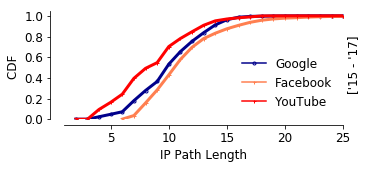

In [13]:
fig = plt.figure(figsize=(5, 2))
plt.rcParams['font.size'] = 12

yticks = np.arange(0,1.1,0.2)

plt.plot(cgttl.xs, cgttl.ps, marker='o', linewidth=3, markersize=3, 
         fillstyle='none', color = 'darkblue', rasterized=True)
plt.plot(cfttl.xs, cfttl.ps, marker='+', linewidth=3, markersize=3, 
         fillstyle='none', color = 'coral', rasterized=True)
plt.plot(cuttl.xs, cuttl.ps, marker='+', linewidth=3, markersize=3, 
         fillstyle='none', color = 'red', rasterized=True)

ylab = "CDF "

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_xlim([1,25])
ax.set_ylim([0,1.05])
ax.set_xscale('linear', basex=2)
ax.set_xlabel('IP Path Length', fontsize=12)
ax.set_ylabel(ylab, fontsize=12)

leg = plt.legend(["Google", "Facebook", 'YouTube'],
           fontsize=12, markerscale=1., loc='best', frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(1.5)
leg.get_frame().set_facecolor('none')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
ax3.set_ylabel('[\'15 - \'17]')
plt.setp(ax3.get_yticklabels(), visible=False)

# plt.title('', fontsize=12, y=1.05)
plt.savefig('../gfx/tracerout_ttl_google_dfacebook.pdf', format='pdf', bbox_inches='tight')

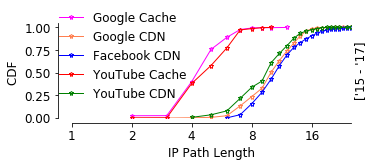

In [14]:
fig = plt.figure(figsize=(5, 1.75))
plt.rcParams['font.size'] = 12

yticks = np.arange(0,1.1,0.25)

plt.plot(cg1ttl.xs, cg1ttl.ps, marker='*', linewidth=1, markersize=5, 
         fillstyle='none', color = 'magenta', rasterized=True)
plt.plot(cg0ttl.xs, cg0ttl.ps, marker='*', linewidth=1, markersize=5, 
         fillstyle='none', color = 'coral', rasterized=True)

plt.plot(cfttl.xs, cfttl.ps, marker='*', linewidth=1, markersize=5, 
         fillstyle='none', color = 'blue', rasterized=True)


plt.plot(cu1ttl.xs, cu1ttl.ps, marker='*', linewidth=1, markersize=5, 
         fillstyle='none', color = 'red', rasterized=True)
plt.plot(cu0ttl.xs, cu0ttl.ps, marker='*', linewidth=1, markersize=5, 
         fillstyle='none', color = 'green', rasterized=True)


ylab = "CDF " #[%.2f M]" %(len(cf4ttl.xs) / 1000000)

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_xlim([1,25])
ax.set_ylim([0,1.05])
ax.set_xscale('log', basex=2)
ax.set_xlabel('IP Path Length', fontsize=12)
ax.set_ylabel(ylab, fontsize=12)
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
ax.xaxis.set_major_formatter(formatter)

leg = ax.legend(["Google Cache","Google CDN", "Facebook CDN", "YouTube Cache", "YouTube CDN"],
           fontsize=12, markerscale=1., bbox_to_anchor=(0.45, 0.07), loc = 'best', frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(1)
leg.get_frame().set_facecolor('none')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
ax3.set_ylabel('[\'15 - \'17]')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.savefig('../gfx/tracerout_ggl_fb_cache.pdf', format='pdf', bbox_inches='tight')

# IP Path Length in different Region (RIPE, ARIN and OTHERS)

In [15]:
eu_1 = ['Belgium', 'France', 'Italy', 'Spain', 'Germany', 'Romania', 'Latvia', \
        'Netherlands' , 'Switzerland', 'Czechia', 'Finland', 'Norway', 'Sweden', \
        'United Kingdom', 'Ireland', 'Slovenia']
# eu_2 = ['Finland', 'Norway', 'Sweden', 'United Kingdom', 'Ireland', 'Slovenia']
us_ca = ['United States', 'Canada']
others = ['South Africa', 'Philippines', 'Singapore', 'New Zealand', 'Japan', 'Israel', \
          'Brazil', 'Bosnia and Herzegovina', 'Australia']

In [16]:
fb_eu = fb_data[fb_data['country'].isin(eu_1)]
fb_us_ca = fb_data[fb_data['country'].isin(us_ca)]
fb_others = fb_data[fb_data['country'].isin(others)]

In [17]:
fb_eu_ttl = np.rint(fb_eu['ttl'] )
fb_us_ca_ttl = np.rint(fb_us_ca['ttl'] )
fb_others_ttl = np.rint(fb_others['ttl'])

cfet = Cdf.MakeCdfFromList(fb_eu_ttl)
cfut = Cdf.MakeCdfFromList(fb_us_ca_ttl)
cfot = Cdf.MakeCdfFromList(fb_others_ttl)

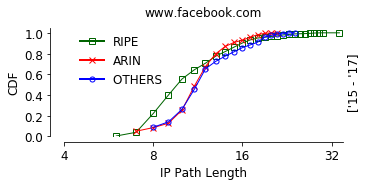

In [18]:
fig = plt.figure(figsize=(5, 2))
plt.rcParams['font.size'] = 12

yticks = np.arange(0,1.1,0.2)

plt.plot(cfet.xs, cfet.ps, marker='s', linewidth=1, markersize=5.07,
         fillstyle='none', color = 'darkgreen')
plt.plot(cfut.xs, cfut.ps, marker='x', linewidth=1, markersize=5.07, 
         fillstyle='none', color = 'red')
plt.plot(cfot.xs, cfot.ps, marker='o', linewidth=1, markersize=5.07, 
         fillstyle='none', color = 'blue')

ylab = "CDF" #[%.2f M]" %(len(cfot.xs) / 1000000)

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_xlim([4,35])
ax.set_ylim([0,1.05])
ax.set_xscale('log', basex=2)
ax.set_xlabel('IP Path Length', fontsize=12)
ax.set_ylabel(ylab, fontsize=12)
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
ax.xaxis.set_major_formatter(formatter)
leg = plt.legend(['RIPE' , 
                  'ARIN' , 
                  'OTHERS '],
           fontsize=12, markerscale=1., loc='center', bbox_to_anchor=(0.21, 0.7), frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)
leg.get_frame().set_facecolor('none')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
ax3.set_ylabel('[\'15 - \'17]')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title("www.facebook.com", fontsize=12, y=1.05)
plt.savefig('../gfx/fb_ttl_region_cdf.pdf', format='pdf', bbox_inches='tight')

## IP Path Length in Selected Operators (British Telecom, ComCast, Telecom Italia) 

In [19]:
# CDF for ASes that have more than 10 probes 
TI = 3269
CC = 7922
BT = 2856

fb_bt = fb_data[fb_data['asn'] == BT]
fb_cc = fb_data[fb_data['asn'] == CC]
fb_ti = fb_data[fb_data['asn'] == TI]

fb_bt_ttl = np.rint(fb_bt['ttl'])
fb_cc_ttl = np.rint(fb_cc['ttl'])
fb_ti_ttl = np.rint(fb_ti['ttl'])

cfbt = Cdf.MakeCdfFromList(fb_bt_ttl)
cfct = Cdf.MakeCdfFromList(fb_cc_ttl)
cftt = Cdf.MakeCdfFromList(fb_ti_ttl)

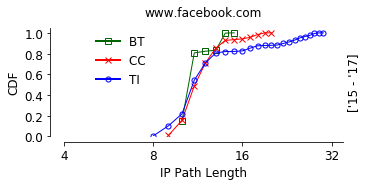

In [20]:
fig = plt.figure(figsize=(5, 2))
plt.rcParams['font.size'] = 12

yticks = np.arange(0,1.1,0.2)

plt.plot(cfbt.xs, cfbt.ps, marker='s', linewidth=1, markersize=5.07,
         fillstyle='none', color = 'darkgreen')
plt.plot(cfct.xs, cfct.ps, marker='x', linewidth=1, markersize=5.07, 
         fillstyle='none', color = 'red')
plt.plot(cftt.xs, cftt.ps, marker='o', linewidth=1, markersize=5.07, 
         fillstyle='none', color = 'blue')

ylab = "CDF" #[%.2f M]" %(len(cfot.xs) / 1000000)

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_xlim([4,35])
ax.set_ylim([0,1.05])
ax.set_xscale('log', basex=2)
ax.set_xlabel('IP Path Length', fontsize=12)
ax.set_ylabel(ylab, fontsize=12)
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
ax.xaxis.set_major_formatter(formatter)
leg = plt.legend(['BT ', 
                  'CC ', 
                  'TI '],
           fontsize=12, markerscale=1., loc='center', bbox_to_anchor=(0.21, 0.7), frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)
leg.get_frame().set_facecolor('none')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
ax3.set_ylabel('[\'15 - \'17]')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title("www.facebook.com", fontsize=12, y=1.05)
plt.savefig('../gfx/fb_ttl_operator_cdf.pdf', format='pdf', bbox_inches='tight')

## TTL of Google with Cache and no cache 

In [21]:
ggl_eu = google_data[google_data['country'].isin(eu_1)]
ggl_us_ca = google_data[google_data['country'].isin(us_ca)]
ggl_others = google_data[google_data['country'].isin(others)]

ggl_cache_eu_ttl = np.rint(ggl_eu[ggl_eu['isp_cache'] == 1]['ttl'])
ggl_cache_us_ca_ttl = np.rint(ggl_us_ca[ggl_us_ca['isp_cache'] == 1]['ttl'])
ggl_cache_others_ttl = np.rint(ggl_others[ggl_others['isp_cache'] == 1]['ttl'])

ggl_nocache_eu_ttl = np.rint(ggl_eu[ggl_eu['isp_cache'] == 0]['ttl'])
ggl_nocache_us_ca_ttl = np.rint(ggl_us_ca[ggl_us_ca['isp_cache'] == 0]['ttl'])
ggl_nocache_others_ttl = np.rint(ggl_others[ggl_others['isp_cache'] == 0]['ttl'])

In [22]:
cg1et = Cdf.MakeCdfFromList(ggl_cache_eu_ttl)
cg1ut = Cdf.MakeCdfFromList(ggl_cache_us_ca_ttl)
cg1ot = Cdf.MakeCdfFromList(ggl_cache_others_ttl)

cg0et = Cdf.MakeCdfFromList(ggl_nocache_eu_ttl)
cg0ut = Cdf.MakeCdfFromList(ggl_nocache_us_ca_ttl)
cg0ot = Cdf.MakeCdfFromList(ggl_nocache_others_ttl)

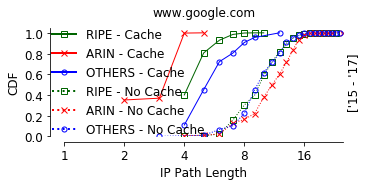

In [23]:
fig = plt.figure(figsize=(5, 2))
plt.rcParams['font.size'] = 12

yticks = np.arange(0,1.1,0.2)

plt.plot(cg1et.xs, cg1et.ps, marker='s', linewidth=1, markersize=5.07,
         fillstyle='none', color = 'darkgreen')
plt.plot(cg1ut.xs, cg1ut.ps, marker='x', linewidth=1, markersize=5.07, 
         fillstyle='none', color = 'red')
plt.plot(cg1ot.xs, cg1ot.ps, marker='o', linewidth=1, markersize=5.07, 
         fillstyle='none', color = 'blue')

plt.plot(cg0et.xs, cg0et.ps, marker='s', linewidth=1, markersize=5.07,
         fillstyle='none', color = 'darkgreen', linestyle=':')
plt.plot(cg0ut.xs, cg0ut.ps, marker='x', linewidth=1, markersize=5.07, 
         fillstyle='none', color = 'red', linestyle=':')
plt.plot(cg0ot.xs, cg0ot.ps, marker='o', linewidth=1, markersize=5.07, 
         fillstyle='none', color = 'blue', linestyle=':')

ylab = "CDF" #[%.2f M]" %(len(cfot.xs) / 1000000)

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_xlim([1,25])
ax.set_ylim([0,1.05])
ax.set_xscale('log', basex=2)
ax.set_xlabel('IP Path Length', fontsize=12)
ax.set_ylabel(ylab, fontsize=12)
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
ax.xaxis.set_major_formatter(formatter)
leg = plt.legend(['RIPE - Cache' , 
                  'ARIN - Cache' , 
                  'OTHERS - Cache', 
                  'RIPE - No Cache' , 
                  'ARIN - No Cache' , 
                  'OTHERS - No Cache'],
           fontsize=12, markerscale=1., loc='center', bbox_to_anchor=(0.23, 0.5), frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)
leg.get_frame().set_facecolor('none')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
ax3.set_ylabel('[\'15 - \'17]')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title("www.google.com", fontsize=12, y=1.05)
plt.savefig('../gfx/ggl_ttl_region_cdf.pdf', format='pdf', bbox_inches='tight')

In [24]:
ggl_bt = google_data[google_data['asn'] == BT]
ggl_cc = google_data[google_data['asn'] == CC]
ggl_ti = google_data[google_data['asn'] == TI]

ggl_cache_bt_ttl = np.rint(ggl_bt[ggl_bt['isp_cache'] == 1]['ttl'])
ggl_cache_cc_ttl = np.rint(ggl_cc[ggl_cc['isp_cache'] == 1]['ttl'])
ggl_cache_ti_ttl = np.rint(ggl_ti[ggl_ti['isp_cache'] == 1]['ttl'])

ggl_nocache_bt_ttl = np.rint(ggl_bt[ggl_bt['isp_cache'] == 0]['ttl'])
ggl_nocache_cc_ttl = np.rint(ggl_cc[ggl_cc['isp_cache'] == 0]['ttl'])
ggl_nocache_ti_ttl = np.rint(ggl_ti[ggl_ti['isp_cache'] == 0]['ttl'])

cg1bt = Cdf.MakeCdfFromList(ggl_cache_bt_ttl)
cg1ct = Cdf.MakeCdfFromList(ggl_cache_cc_ttl)
cg1tt = Cdf.MakeCdfFromList(ggl_cache_ti_ttl)

cg0bt = Cdf.MakeCdfFromList(ggl_nocache_bt_ttl)
cg0ct = Cdf.MakeCdfFromList(ggl_nocache_cc_ttl)
cg0tt = Cdf.MakeCdfFromList(ggl_nocache_ti_ttl)

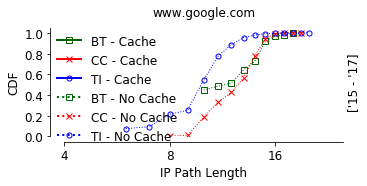

In [25]:
fig = plt.figure(figsize=(5, 2))
plt.rcParams['font.size'] = 12

yticks = np.arange(0,1.1,0.2)

plt.plot(cg1bt.xs, cg1bt.ps, marker='s', linewidth=1, markersize=5.07,
         fillstyle='none', color = 'darkgreen')
plt.plot(cg1ct.xs, cg1ct.ps, marker='x', linewidth=1, markersize=5.07, 
         fillstyle='none', color = 'red')
plt.plot(cg1tt.xs, cg1tt.ps, marker='o', linewidth=1, markersize=5.07, 
         fillstyle='none', color = 'blue')

plt.plot(cg0bt.xs, cg0bt.ps, marker='s', linewidth=1, markersize=5.07,
         fillstyle='none', color = 'darkgreen', linestyle=':')
plt.plot(cg0ct.xs, cg0ct.ps, marker='x', linewidth=1, markersize=5.07, 
         fillstyle='none', color = 'red', linestyle=':')
plt.plot(cg0tt.xs, cg0tt.ps, marker='o', linewidth=1, markersize=5.07, 
         fillstyle='none', color = 'blue', linestyle=':')

ylab = "CDF" #[%.2f M]" %(len(cfot.xs) / 1000000)

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_xlim([4,25])
ax.set_ylim([0,1.05])
ax.set_xscale('log', basex=2)
ax.set_xlabel('IP Path Length', fontsize=12)
ax.set_ylabel(ylab, fontsize=12)
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
ax.xaxis.set_major_formatter(formatter)
leg = plt.legend(['BT - Cache' , 
                  'CC - Cache' , 
                  'TI - Cache', 
                  'BT - No Cache' , 
                  'CC - No Cache' , 
                  'TI - No Cache'],
           fontsize=12, markerscale=1., loc='center', bbox_to_anchor=(0.19, 0.44), frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)
leg.get_frame().set_facecolor('none')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
ax3.set_ylabel('[\'15 - \'17]')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title("www.google.com", fontsize=12, y=1.05)
plt.savefig('../gfx/ggl_ttl_operator_cdf.pdf', format='pdf', bbox_inches='tight')

## Facebook on Comcast

In [26]:
fb_data.tail()

,Unnamed: 0,msmid,date,service,cdnname,isp_cache,ipversion,ttl,unit_id,country,asn,operator
89974,21362315,fcb2241ea83211e6bc2b00e08147c934,2018-02-26,www.facebook.com,Facebook,0,6,7.0,950224,Slovenia,34779.0,"T-2-AS - T-2, d.o.o."
89975,21362817,fcb2241ea83211e6bc2b00e08147c934,2018-02-27,www.facebook.com,Facebook,0,4,7.0,950224,Slovenia,34779.0,"T-2-AS - T-2, d.o.o."
89976,21362818,fcb2241ea83211e6bc2b00e08147c934,2018-02-27,www.facebook.com,Facebook,0,6,7.0,950224,Slovenia,34779.0,"T-2-AS - T-2, d.o.o."
89977,21363320,fcb2241ea83211e6bc2b00e08147c934,2018-02-28,www.facebook.com,Facebook,0,4,7.0,950224,Slovenia,34779.0,"T-2-AS - T-2, d.o.o."
89978,21363321,fcb2241ea83211e6bc2b00e08147c934,2018-02-28,www.facebook.com,Facebook,0,6,7.0,950224,Slovenia,34779.0,"T-2-AS - T-2, d.o.o."


In [27]:
comcast = fb_data[fb_data['operator'] == 'COMCAST-7922 - Comcast Cable Communications']
cc_probes = set(comcast['unit_id'])

In [28]:
bt = fb_data[fb_data['operator'] == 'BT-UK-AS - British Telecommunications PLC']
bt_probes = set(bt['unit_id'])
ti = fb_data[fb_data['operator'] == 'ASN-IBSNAZ - Telecom Italia S.p.a.']
ti_probes = set(ti['unit_id'])

In [29]:
print("Comcast")
cc_ttl = {}
for c in cc_probes:
    d = comcast[comcast['unit_id'] == c]['ttl']
    cc_ttl[c] = np.rint(np.median(d))
    print("Probe %d: Median = %d, Mean = %d" %(c, np.median(d), np.mean(d)))
print(cc_ttl)

Comcast
Probe 663072: Median = 16, Mean = 14
Probe 659044: Median = 12, Mean = 11
Probe 661030: Median = 13, Mean = 13
Probe 659048: Median = 11, Mean = 11
Probe 661032: Median = 11, Mean = 12
Probe 658893: Median = 11, Mean = 13
Probe 660078: Median = 11, Mean = 11
Probe 658929: Median = 10, Mean = 10
Probe 658739: Median = 11, Mean = 11
Probe 658899: Median = 11, Mean = 11
Probe 950232: Median = 12, Mean = 12
Probe 950236: Median = 11, Mean = 11
{663072: 16.0, 659044: 12.0, 661030: 13.0, 659048: 11.0, 661032: 11.0, 658893: 11.0, 660078: 12.0, 658929: 10.0, 658739: 11.0, 658899: 11.0, 950232: 13.0, 950236: 11.0}
